In [1]:
import pandas as pd

In [45]:
df = pd.read_csv("C:\\Users\\micro\\Downloads\\Compressed\\archive_3\\train.csv")

In [46]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [9]:
#check for nulls

In [10]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [5]:
df.dropna(inplace = True)

In [8]:
#check for duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [55]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')




In [56]:
df = df.dropna(subset=['Order Date'])


In [57]:
df.set_index('Order Date', inplace=True)


In [58]:
df = df.sort_index()


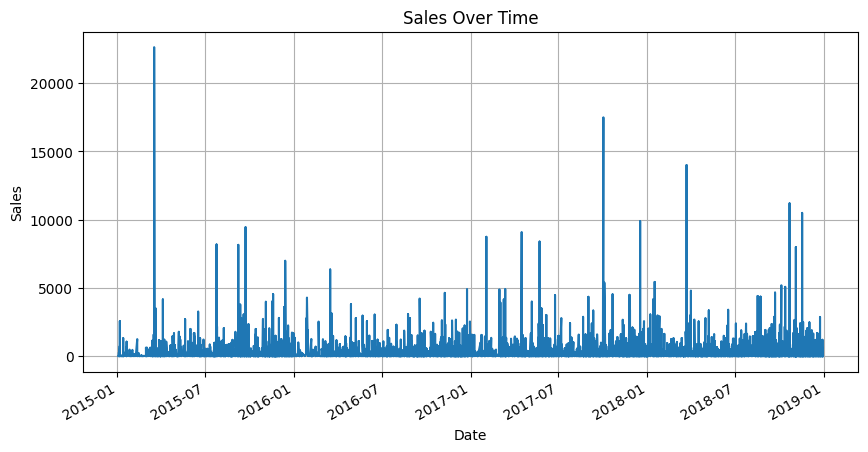

In [59]:
df['Sales'].plot(title='Sales Over Time', figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model with example parameters
model = SARIMAX(df['Sales'],
                order=(1, 1, 1),              # (p, d, q)
                seasonal_order=(1, 1, 1, 7),  # (P, D, Q, s) — s=7 for weekly seasonality
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

# Print model summary
print(results.summary())


C:\Users\micro\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\micro\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                             Sales   No. Observations:                 9800
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -78489.375
Date:                           Sat, 20 Sep 2025   AIC                         156988.750
Time:                                   15:25:45   BIC                         157024.692
Sample:                                        0   HQIC                        157000.929
                                          - 9800                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0009      0.027     -0.032      0.975      -0.054       0.052
ma.L1         -0.9992      0.003   -399.601

C:\Users\micro\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\micro\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


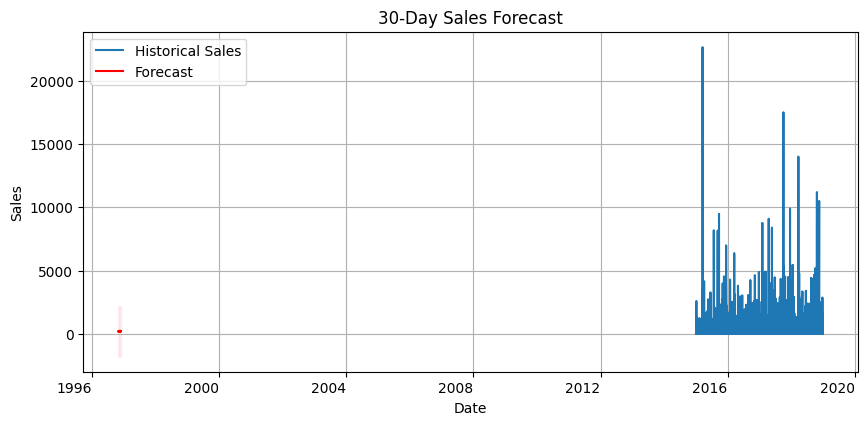

In [61]:
# Forecast next 30 days
forecast = results.get_forecast(steps=30)
forecast_df = forecast.summary_frame()

# Plot historical sales and forecast
plt.figure(figsize=(10, 5))
df['Sales'].plot(label='Historical Sales')
forecast_df['mean'].plot(label='Forecast', color='red')
plt.fill_between(forecast_df.index,
                 forecast_df['mean_ci_lower'],
                 forecast_df['mean_ci_upper'],
                 color='pink', alpha=0.3)
plt.title('30-Day Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
